In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

Исходные данные

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж

# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

1. Подберите скорость обучения (alpha) и количество итераций:

0 [1.1102 0.84  ] 3173.15
500 [21.04606457  8.74617136] 415.355423398327
1000 [31.66648131  6.78503276] 176.46806566379882
1500 [37.97952317  5.61928129] 92.05932434403572
2000 [41.73215361  4.92632937] 62.2342399245102
2500 [43.96281128  4.51442137] 51.69580934583289
3000 [45.28877016  4.26957292] 47.97214782992787
3500 [46.07695337  4.12402886] 46.656424868950594
4000 [46.54546925  4.03751382] 46.19152576288303
4500 [46.82396684  3.98608711] 46.02725776328683
5000 [46.98951279  3.95551778] 45.96921511416331
5500 [47.08791746  3.93734661] 45.94870625592217
6000 [47.14641166  3.92654521] 45.94145963171208
6500 [47.18118209  3.92012458] 45.938899100948994
7000 [47.2018505  3.916308 ] 45.93799435998288
7500 [47.21413632  3.91403933] 45.93767467774063
8000 [47.22143932  3.91269078] 45.937561720839334
8500 [47.22578041  3.91188916] 45.93752180851434
9000 [47.22836086  3.91141266] 45.93750770584623
9500 [47.22989474  3.91112942] 45.937502722792814


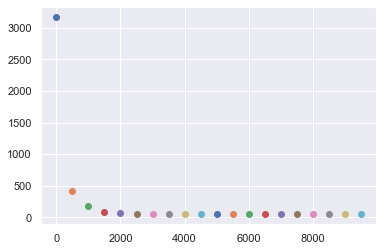

In [3]:
n = X.shape[1]
alpha = 0.001
w = np.array([1, 0.5])

for i in range(10000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 500 == 0:
        print(i, w, err)
        plt.scatter(x=i, y=err)

y = 47.231 + 3.911*x


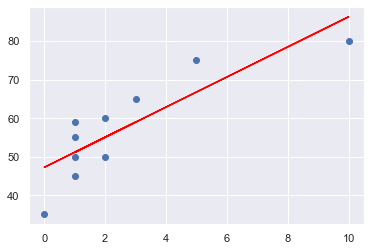

In [4]:
# в итоге получается следующеее
print(f'y = {round(w[0],3)} + {round(w[1], 3)}*x')

plt.scatter(X[1], y)
plt.plot(X[1], w[0] + w[1] * X[1], color='red')
plt.show()

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [5]:
w = np.array([1, 0.5])

for i in range(5900):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    '''for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))'''
    w -= alpha * 1/n * 2 * np.sum(X * (y_pred - y), axis=1)
    if i % 500 == 0:
        print(i, w, err)

0 [1.1102 0.84  ] 3173.15
500 [21.04606457  8.74617136] 415.355423398327
1000 [31.66648131  6.78503276] 176.46806566379882
1500 [37.97952317  5.61928129] 92.05932434403572
2000 [41.73215361  4.92632937] 62.2342399245102
2500 [43.96281128  4.51442137] 51.69580934583289
3000 [45.28877016  4.26957292] 47.97214782992787
3500 [46.07695337  4.12402886] 46.656424868950594
4000 [46.54546925  4.03751382] 46.19152576288303
4500 [46.82396684  3.98608711] 46.02725776328683
5000 [46.98951279  3.95551778] 45.96921511416331
5500 [47.08791746  3.93734661] 45.94870625592217


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

0 [1.1102 0.84  ] 3173.15
500 [21.04606457  8.74617136] 415.355423398327
1000 [31.66648131  6.78503276] 176.46806566379882
1500 [37.97952317  5.61928129] 92.05932434403572
2000 [41.73215361  4.92632937] 62.2342399245102
2500 [43.96281128  4.51442137] 51.69580934583289
3000 [45.28877016  4.26957292] 47.97214782992787
3500 [46.07695337  4.12402886] 46.656424868950594
4000 [46.54546925  4.03751382] 46.19152576288303
4500 [46.82396684  3.98608711] 46.02725776328683
5000 [46.98951279  3.95551778] 45.96921511416331
5500 [47.08791746  3.93734661] 45.94870625592217
5910 [47.13789897  3.92811714] 45.942285016491965


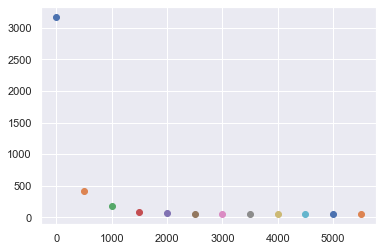

In [6]:
n = X.shape[1]
alpha = 0.001
w = np.array([1, 0.5])
threshold = 0.99999
i = 0
errs = []

# останавливается, если изменения ошибки лишь в 6 знаке после запятой
while round(err, 5) - round(errs[-2], 5) != 0 if len(errs) > 1 else True:
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    errs.append(err)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 500 == 0:
        print(i, w, err)
        plt.scatter(x=i, y=err)
    i+=1
print(i, w, err)